# $\mathrm{H_2O_2}$

In [1]:
using Pkg 
Pkg.activate("../")

  Activating project at `~/gitrepos/activepure/Photolysis.jl/mcm`


In [2]:
using Plots, MLPlotRecipes
using HDF5
using Tables, DataFrames, CSV
using MLJ, MLJGaussianProcesses
using StatsBase 
using KernelFunctions
using ParameterHandling

In [3]:
include("./utils.jl")

filter_outliers (generic function with 1 method)

In [4]:
# load in spectrometer data
hr4000_df = CSV.File("../hr4000_wavelengths.txt") |> DataFrame ; 

based on [this data](http://chmlin9.leeds.ac.uk/MCMv3.3.1/parameters/photolysis/H2O2/h2o2_iupac2003_cs_298.txt), the MCM sets QY to $1.0$ for $\lambda \geq 230.0$ nm. 

# Model Evaluation

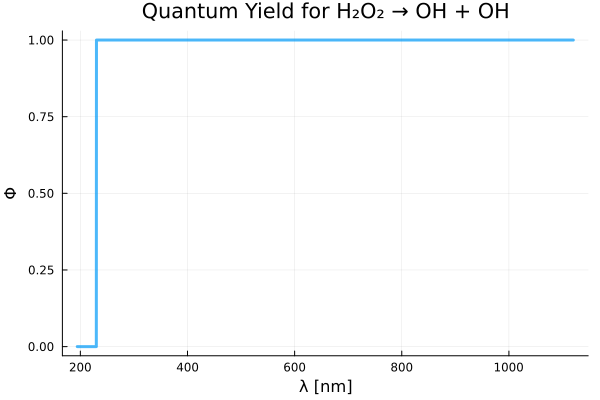

In [7]:
λ = hr4000_df.λ
Φ = ones(size(λ))

idxs = [idx for idx ∈ 1:size(λ,1) if λ[idx] < 230.0]
Φ[idxs] .= 0.0

p = plot(
    λ,
    Φ,
    xlabel="λ [nm]",
    ylabel="Φ",
    alpha=0.7,
    label="",
    title="Quantum Yield for H₂O₂ → OH + OH",
    lw=3
)

# Output for Photolysis Rate Determination

In [14]:
df_photolysis_Φ = CSV.File("../photolysis_Φ.csv") |> DataFrame;

describe(df_photolysis_Φ)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,Φ_1,0.114981,0.0,0.0,1.0,0,Float64
2,Φ_2,0.885019,0.0,1.0,1.0,0,Float64


In [15]:
df_photolysis_Φ.Φ_3 = Φ

describe(df_photolysis_Φ)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,Φ_1,0.114981,0.0,0.0,1.0,0,Float64
2,Φ_2,0.885019,0.0,1.0,1.0,0,Float64
3,Φ_3,0.963542,0.0,1.0,1.0,0,Float64


In [16]:
CSV.write("../photolysis_Φ.csv", df_photolysis_Φ)

"../photolysis_Φ.csv"